In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib Inline

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


# 1. Data Pre-processing

### Understanding the dataset

In [3]:
data.shape

(1309, 21)

In [4]:
data.size

27489

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [8]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0


In [9]:
data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

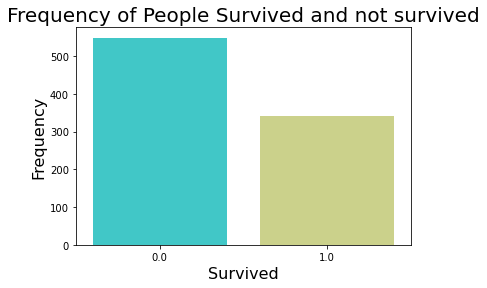

In [10]:
sns.countplot(x=data['Survived'],palette='rainbow',data=data)
plt.xlabel(xlabel='Survived',fontsize=16)
plt.ylabel(ylabel='Frequency',fontsize=16)
plt.title('Frequency of People Survived and not survived',fontsize=20)
plt.show()

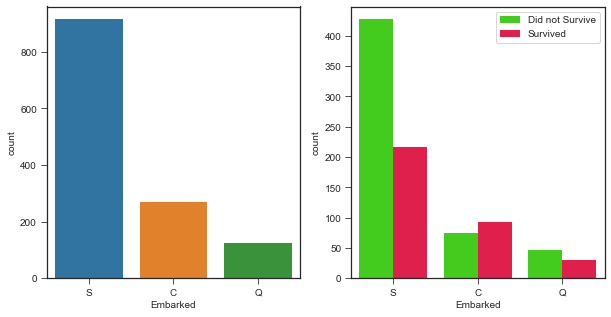

In [11]:
plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Embarked',data=data,ax=ax[0])
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1],palette='prism')
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

In [12]:
data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

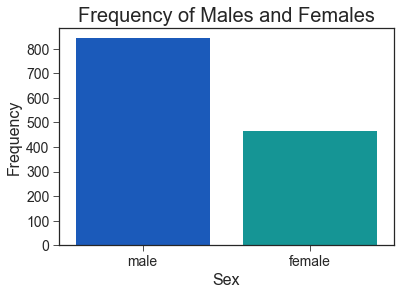

In [13]:
sns.countplot(x=data['Sex'],palette='winter',data=data)
plt.xlabel(xlabel='Sex',fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel(ylabel='Frequency',fontsize=16)
plt.yticks(fontsize=14)
plt.title('Frequency of Males and Females',fontsize=20)
plt.show()

In [14]:
data['Age'].value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64

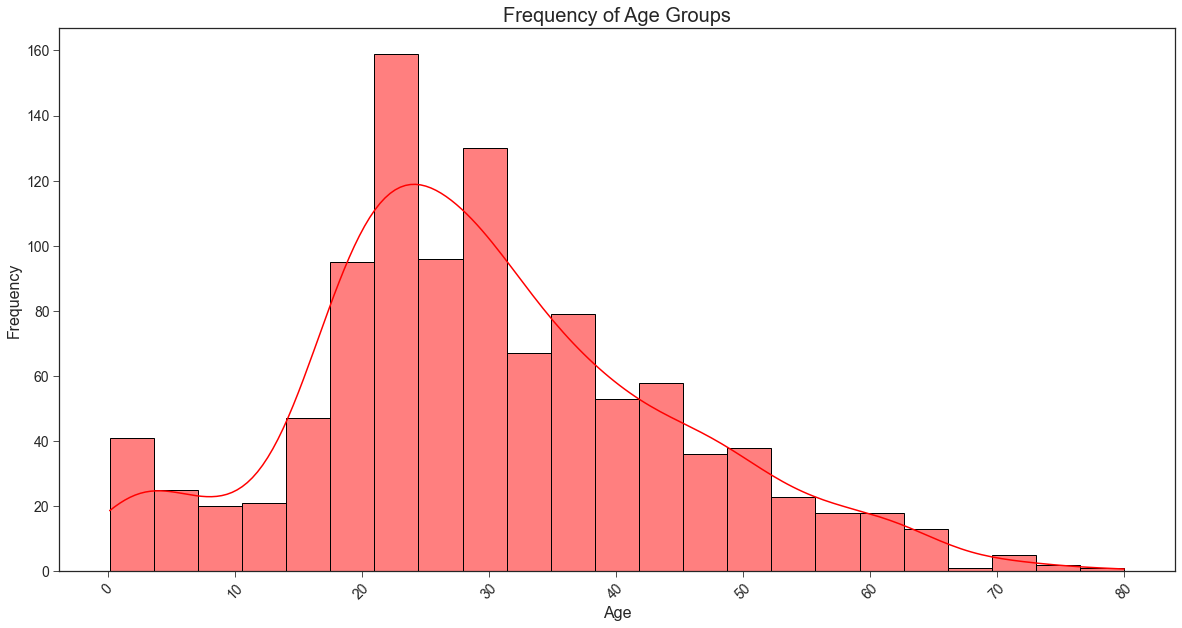

In [15]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Age'],data=data,kde=True,color='red')
plt.xlabel(xlabel='Age',fontsize=16)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel(ylabel='Frequency',fontsize=16)
plt.yticks(fontsize=14)
plt.title('Frequency of Age Groups',fontsize=20)
plt.show()

In [16]:
data['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

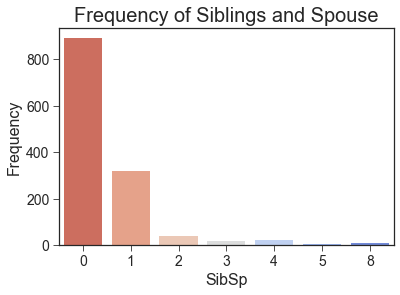

In [17]:
sns.countplot(x=data['SibSp'],palette='coolwarm_r',data=data)
plt.xlabel(xlabel='SibSp',fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel(ylabel='Frequency',fontsize=16)
plt.yticks(fontsize=14)
plt.title('Frequency of Siblings and Spouse',fontsize=20)
plt.show()

In [18]:
data['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

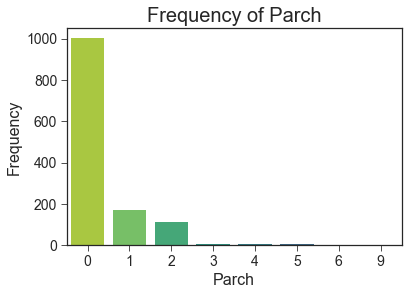

In [19]:
sns.countplot(x=data['Parch'],palette='viridis_r',data=data)
plt.xlabel(xlabel='Parch',fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel(ylabel='Frequency',fontsize=16)
plt.yticks(fontsize=14)
plt.title('Frequency of Parch',fontsize=20)
plt.show()

In [20]:
data['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [21]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

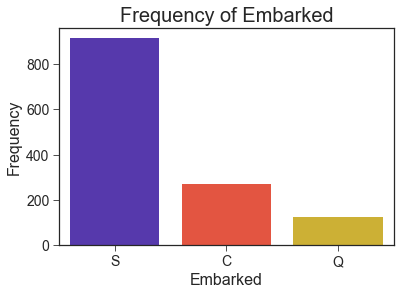

In [22]:
sns.countplot(x=data['Embarked'],palette='CMRmap',data=data)
plt.xlabel(xlabel='Embarked',fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel(ylabel='Frequency',fontsize=16)
plt.yticks(fontsize=14)
plt.title('Frequency of Embarked',fontsize=20)
plt.show()

In [23]:
data['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

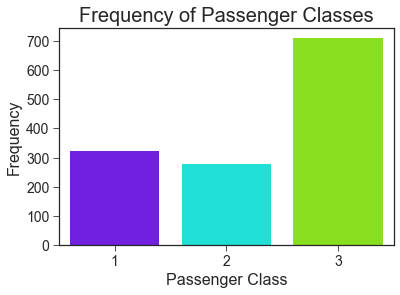

In [24]:
sns.countplot(x=data['Pclass'],palette='hsv_r',data=data)
plt.xlabel(xlabel='Passenger Class',fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel(ylabel='Frequency',fontsize=16)
plt.yticks(fontsize=14)
plt.title('Frequency of Passenger Classes',fontsize=20)
plt.show()

### Handling Null Values

In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [26]:
## DROPPING THE Unneccessary columns
data.drop(labels=['PassengerId','Name','Ticket','WikiId','Name_wiki','Age_wiki','Hometown','Boarded','Destination','Lifeboat','Body','Class'],axis=1,inplace=True)

In [27]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [28]:
survived = data['Survived']


In [29]:
survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [30]:
survived.isnull().sum()

418

In [31]:
survived.fillna(value=0.0,inplace=True)

In [32]:
data.drop(labels=['Survived'],inplace=True,axis=1)

In [33]:
data.isnull().sum()

Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

Text(0.5, 1.0, 'Missing Values')

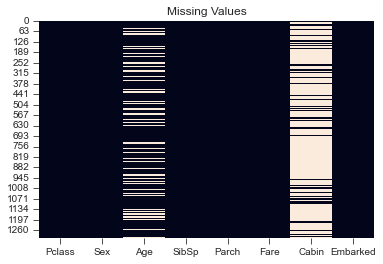

In [34]:
sns.heatmap(data.isna(),cbar=False)
plt.title('Missing Values')

In [35]:
data.shape

(1309, 8)

In [36]:
## out of 1309 rows 1014(77%) of Cabin are null thus we can drop cabin
data.drop(labels=['Cabin'],axis=1,inplace=True)

Text(0.5, 1.0, 'Missing Values')

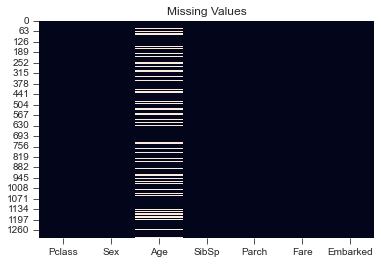

In [37]:
sns.heatmap(data.isna(),cbar=False)
plt.title('Missing Values')

In [38]:
data['Age'].isnull().sum()  #263/1309 = 20%

263

In [39]:
data['Age'].mean()

29.881137667304014

In [40]:
data['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [41]:
data['Age'].sample(15)

73      26.00
1296    20.00
1013    35.00
436     21.00
999       NaN
944     28.00
232     59.00
532     17.00
602       NaN
686     14.00
1201    18.00
995     16.00
980      2.00
831      0.83
159       NaN
Name: Age, dtype: float64

In [42]:
data['Age'].fillna(value=24.0,inplace=True)

Text(0.5, 1.0, 'Missing Values')

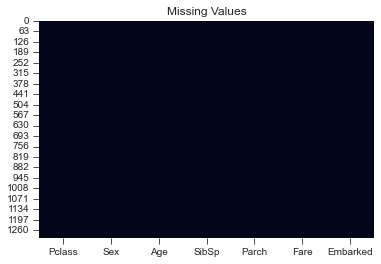

In [43]:
sns.heatmap(data.isna(),cbar=False)
plt.title('Missing Values')

In [44]:
data['Fare'].isnull().sum()

1

In [45]:
data['Fare'].mean()

33.2954792813456

In [46]:
data['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [47]:
data['Fare'].fillna(value=33.29,inplace=True)

# Exploratory Data Analysis

In [48]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [49]:
survived.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

### Gender versus Survival Ratio

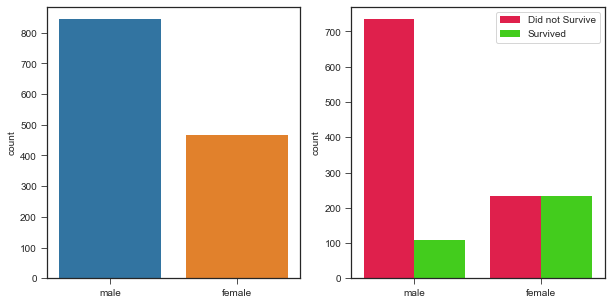

In [50]:
plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Sex',data=data,ax=ax[0])
ax[0].set_xlabel(None)
sns.countplot(x='Sex',hue=survived,data=data,ax=ax[1],palette='prism_r')
ax[1].set_xlabel(None)
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

### Age versus Survival Ratio

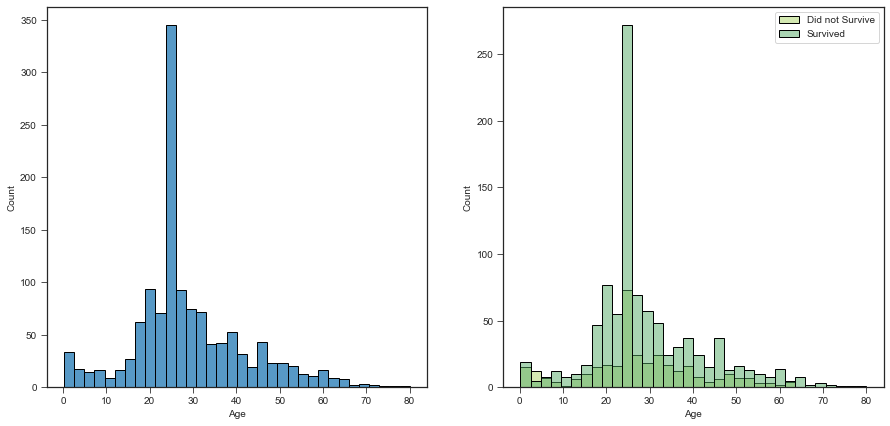

In [51]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x='Age',data=data,ax=ax[0])
sns.histplot(x='Age',hue=survived,data=data,ax=ax[1],palette='summer')
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

### Sibling and Spouse with survival Ratio

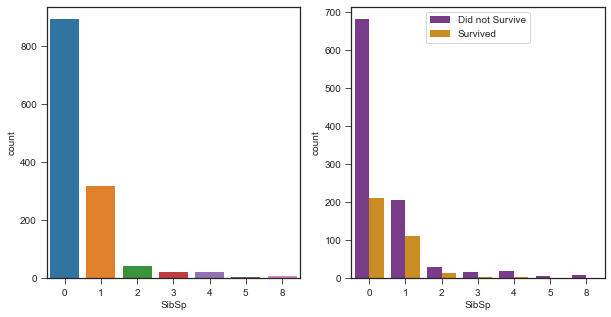

In [52]:
plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='SibSp',data=data,ax=ax[0])
sns.countplot(x='SibSp',hue=survived,data=data,ax=ax[1],palette='CMRmap')
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

### Parch versus survival Ratio

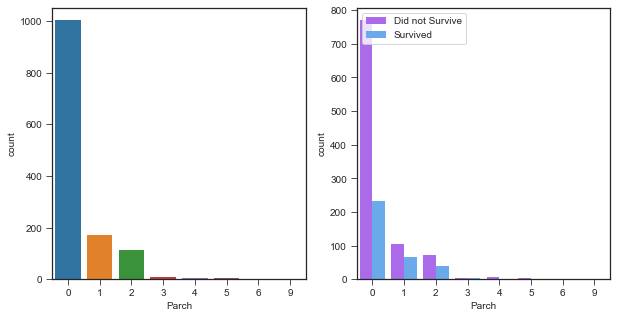

In [53]:
plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Parch',data=data,ax=ax[0])
sns.countplot(x='Parch',hue=survived,data=data,ax=ax[1],palette='cool_r')
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

### Embarked versus Survival Ratio

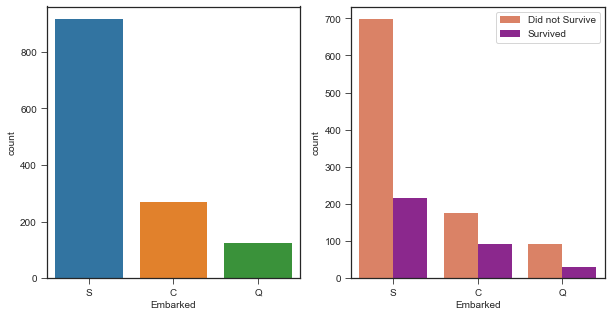

In [54]:
plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Embarked',data=data,ax=ax[0])
sns.countplot(x='Embarked',hue=survived,data=data,ax=ax[1],palette='plasma_r')
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

### Passenger Class versus Survival Ratio

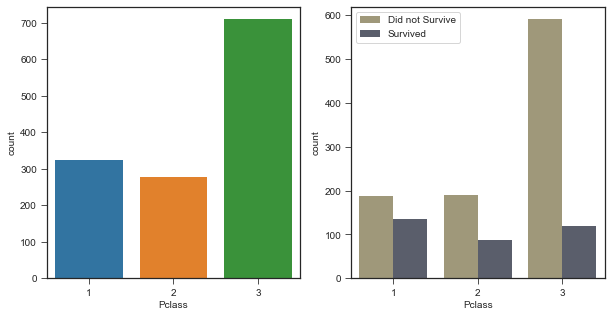

In [55]:
plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Pclass',data=data,ax=ax[0])
sns.countplot(x='Pclass',hue=survived,data=data,ax=ax[1],palette='cividis_r')
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

([<matplotlib.patches.Wedge at 0x22dca87ffd0>,
 [Text(-1.4996024728425499, 1.609718119250855, 'Did not survive'),
  Text(1.4996024728425499, -1.6097181192508552, 'Surived')],
 [Text(-0.8179649851868452, 0.8780280650459208, '      74%'),
  Text(0.8179649851868452, -0.878028065045921, '      26%')])

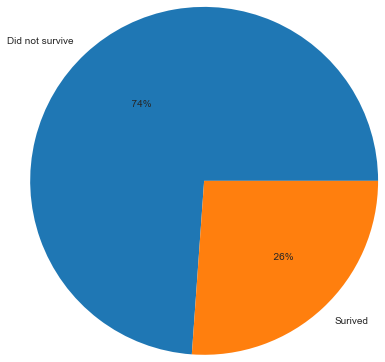

In [56]:
plt.pie(survived.value_counts(),labels=['Did not survive','Surived'],autopct='%8.0f%%',radius=2)

## Conclusions

#### 1. It can be observed from chart 1 that Females Have more survival Ratio than Males
#### 2. From chart 2, Most people present were between the age of 20 and 40 and most people not surviving were in this range.
#### 3. From chart 3&4, Most people were travelling alone. The more family one have the less survival rate one have.
#### 4. From chart 4, People who boarded from Cherbourg(C) have a higher survival chances.
#### 5. From chart 5, Passengers of class 1 has higher survival rate. Class 3 has the lowest.
#### 6. From chart 6, It can be observed that overall 74% have not survived and 26% have survived

# Model Training

### Feature Selection and Encoding

In [57]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder = LabelEncoder()

In [61]:
Sex = encoder.fit_transform(data['Sex'])
Sex

array([1, 0, 0, ..., 1, 1, 1])

In [62]:
Embarked = encoder.fit_transform(data['Embarked'])

In [63]:
new_data = data.copy()

In [64]:
new_data.drop(labels=['Sex','Embarked'],axis=1,inplace=True)

In [65]:
new_data.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [66]:
new_data['Sex'] = Sex
new_data['Embarked'] = Embarked

In [67]:
new_data.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2
5,3,24.0,0,0,8.4583,1,1
6,1,54.0,0,0,51.8625,1,2
7,3,2.0,3,1,21.0750,1,2
8,3,27.0,0,2,11.1333,0,2
9,2,14.0,1,0,30.0708,0,0


In [68]:
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,24.0,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


####  from 2 data frames after encoding it can be observed that 
#### 1. In Sex => male = 1, female=0
#### 2. In Embarked => C=0, Q=1, S=2

### Splitting the data into train and test

In [69]:
survived

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    0.0
1305    0.0
1306    0.0
1307    0.0
1308    0.0
Name: Survived, Length: 1309, dtype: float64

In [70]:
survived = survived.astype(int)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,x_test,Y_train,y_test=train_test_split(new_data,survived,test_size=0.25,random_state=42)

In [73]:
print('Training Data sizes')
print(X_train.shape)
print(Y_train.shape)

Training Data sizes
(981, 7)
(981,)


In [74]:
print('Testing Data sizes')
print(x_test.shape)
print(y_test.shape)

Testing Data sizes
(328, 7)
(328,)


In [75]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
1139,2,29.0,1,0,26.0000,0,2
678,3,43.0,1,6,46.9000,0,2
290,1,26.0,0,0,78.8500,0,2
285,3,33.0,0,0,8.6625,1,0
1157,1,24.0,0,0,0.0000,1,2


In [76]:
X_train.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Embarked    0
dtype: int64

In [77]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
1148,3,28.0,0,0,8.050,1,2
1049,1,42.0,0,0,26.550,1,2
982,3,24.0,0,0,7.775,1,2
808,2,39.0,0,0,13.000,1,2
1195,3,24.0,0,0,7.750,0,1


In [78]:
Y_train.head()

1139    0
678     0
290     1
285     0
1157    0
Name: Survived, dtype: int32

In [79]:
Y_train.isnull().sum()

0

In [80]:
y_test.head()

1148    0
1049    0
982     0
808     0
1195    0
Name: Survived, dtype: int32

In [81]:
result_df = pd.DataFrame()
result_df['y_test'] = y_test
result_df.head()

,y_test
1148,0
1049,0
982,0
808,0
1195,0


### Model Building

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### 1. Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logistic = LogisticRegression(max_iter=300)
logistic.fit(X_train, Y_train)

LogisticRegression(max_iter=300)

In [85]:
print('Training Accuracy = {}'.format(accuracy_score(Y_train,logistic.predict(X_train))))

Training Accuracy = 0.7951070336391437


In [86]:
y_predicted_logistic = logistic.predict(x_test)

In [87]:
print('Testing Accuracy = {}'.format(accuracy_score(y_test,y_predicted_logistic)))

Testing Accuracy = 0.7560975609756098


In [88]:
## Generating Confusion Matrix
cm1 = confusion_matrix(y_test,y_predicted_logistic)
cm1

array([[217,  17],
       [ 63,  31]], dtype=int64)

In [89]:
print(classification_report(y_test,y_predicted_logistic))

              precision    recall  f1-score   support

           0       0.78      0.93      0.84       234
           1       0.65      0.33      0.44        94

    accuracy                           0.76       328
   macro avg       0.71      0.63      0.64       328
weighted avg       0.74      0.76      0.73       328



In [90]:
result_df['Logistic_Test'] = y_predicted_logistic
result_df.sample(5)

,y_test,Logistic_Test
254,0,0
823,1,0
1061,0,0
514,0,0
915,0,1


#### 2. KNN classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier

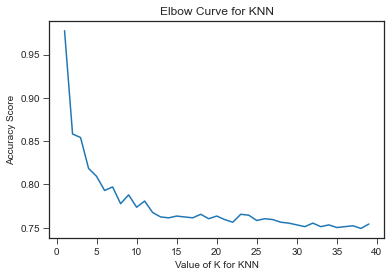

In [92]:
## elbow curve to find good k value
l = range(1, 40)
scores = []
for k in l:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_train, Y_train))

plt.plot(l, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Elbow Curve for KNN')
plt.show()

In [93]:
## using k=12
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=12)

In [94]:
print('Training Accuracy = {}'.format(accuracy_score(Y_train,knn.predict(X_train))))

Training Accuracy = 0.7675840978593272


In [95]:
y_predicted_knn = knn.predict(x_test)

In [96]:
print('Testing Accuracy = {}'.format(accuracy_score(y_test,y_predicted_knn)))

Testing Accuracy = 0.7225609756097561


In [97]:
## Generating Confusion Matrix
cm2 = confusion_matrix(y_test,y_predicted_knn)
cm2

array([[223,  11],
       [ 80,  14]], dtype=int64)

In [98]:
print(classification_report(y_test,y_predicted_knn))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       234
           1       0.56      0.15      0.24        94

    accuracy                           0.72       328
   macro avg       0.65      0.55      0.53       328
weighted avg       0.69      0.72      0.66       328



In [99]:
result_df['KNN'] = y_predicted_knn
result_df.sample(5)

,y_test,Logistic_Test,KNN
998,0,0,0
1227,0,0,0
527,0,0,0
490,0,0,0
1108,0,0,0


#### 3. Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [102]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [103]:
print('Training Accuracy = {}'.format(accuracy_score(Y_train,dt.predict(X_train))))

Training Accuracy = 0.8297655453618756


In [104]:
y_predicted_DT = dt.predict(x_test)

In [105]:
print('Testing Accuracy = {}'.format(accuracy_score(y_test,y_predicted_DT)))

Testing Accuracy = 0.7804878048780488


In [106]:
## Generating Confusion Matrix
cm3 = confusion_matrix(y_test,y_predicted_DT)
cm3

array([[207,  27],
       [ 45,  49]], dtype=int64)

In [107]:
print(classification_report(y_test,y_predicted_DT))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       234
           1       0.64      0.52      0.58        94

    accuracy                           0.78       328
   macro avg       0.73      0.70      0.71       328
weighted avg       0.77      0.78      0.77       328



In [108]:
result_df['DecisionTree'] = y_predicted_DT
result_df.sample(5)

,y_test,Logistic_Test,KNN,DecisionTree
716,1,1,0,1
915,0,1,0,1
497,0,0,0,0
430,1,0,0,0
308,0,0,0,0


#### 4. Bayesian Classifier

In [109]:
from sklearn.naive_bayes import GaussianNB

In [110]:
naive = GaussianNB()

In [111]:
naive.fit(X_train, Y_train)

GaussianNB()

In [112]:
print('Training Accuracy = {}'.format(accuracy_score(Y_train,naive.predict(X_train))))

Training Accuracy = 0.7604485219164119


In [113]:
y_predicted_naive = naive.predict(x_test)

In [114]:
print('Testing Accuracy = {}'.format(accuracy_score(y_test,y_predicted_naive)))

Testing Accuracy = 0.7195121951219512


In [115]:
## Generating Confusion Matrix
cm4 = confusion_matrix(y_test,y_predicted_naive)
cm4

array([[208,  26],
       [ 66,  28]], dtype=int64)

In [116]:
print(classification_report(y_test,y_predicted_naive))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       234
           1       0.52      0.30      0.38        94

    accuracy                           0.72       328
   macro avg       0.64      0.59      0.60       328
weighted avg       0.69      0.72      0.69       328



In [117]:
result_df['Bayesian'] = y_predicted_naive
result_df.sample(5)

,y_test,Logistic_Test,KNN,DecisionTree,Bayesian
1102,0,0,0,0,0
427,1,1,0,1,1
514,0,0,0,0,0
610,0,0,0,0,0
435,1,1,1,1,1


#### 5. Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)

In [120]:
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [121]:
print('Training Accuracy = {}'.format(accuracy_score(Y_train,rf.predict(X_train))))

Training Accuracy = 0.9785932721712538


In [122]:
y_predicted_rf = rf.predict(x_test)

In [123]:
print('Testing Accuracy = {}'.format(accuracy_score(y_test,y_predicted_rf)))

Testing Accuracy = 0.7195121951219512


In [124]:
## Generating Confusion Matrix
cm5 = confusion_matrix(y_test,y_predicted_rf)
cm5

array([[194,  40],
       [ 52,  42]], dtype=int64)

In [125]:
print(classification_report(y_test,y_predicted_rf))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       234
           1       0.51      0.45      0.48        94

    accuracy                           0.72       328
   macro avg       0.65      0.64      0.64       328
weighted avg       0.71      0.72      0.71       328



In [126]:
result_df['RandomForest'] = y_predicted_rf
result_df.sample(5)

,y_test,Logistic_Test,KNN,DecisionTree,Bayesian,RandomForest
109,1,0,0,1,0,1
1070,0,0,0,0,1,1
123,1,1,0,1,0,1
1061,0,0,0,0,0,0
10,1,0,0,0,0,0


#### 6. SVM Classifier

In [127]:
from sklearn import svm

In [128]:
SVM = svm.SVC(kernel='poly',degree=7)

In [129]:
SVM.fit(X_train,Y_train)

SVC(degree=7, kernel='poly')

In [130]:
print('Training Accuracy = {}'.format(accuracy_score(Y_train,SVM.predict(X_train))))

Training Accuracy = 0.763506625891947


In [131]:
y_predicted_svm = SVM.predict(x_test)

In [132]:
print('Testing Accuracy = {}'.format(accuracy_score(y_test,y_predicted_svm)))

Testing Accuracy = 0.7134146341463414


In [133]:
## Generating Confusion Matrix
cm5 = confusion_matrix(y_test,y_predicted_svm)
cm5

array([[232,   2],
       [ 92,   2]], dtype=int64)

In [134]:
print(classification_report(y_test,y_predicted_svm))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       234
           1       0.50      0.02      0.04        94

    accuracy                           0.71       328
   macro avg       0.61      0.51      0.44       328
weighted avg       0.65      0.71      0.60       328



In [135]:
result_df['SVM'] = y_predicted_svm
result_df.sample(5)

,y_test,Logistic_Test,KNN,DecisionTree,Bayesian,RandomForest,SVM
1013,0,1,1,1,1,1,0
331,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0
429,1,0,0,0,0,0,0
1195,0,0,1,0,0,1,0


# Comparing the models

D:\anaconda_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one

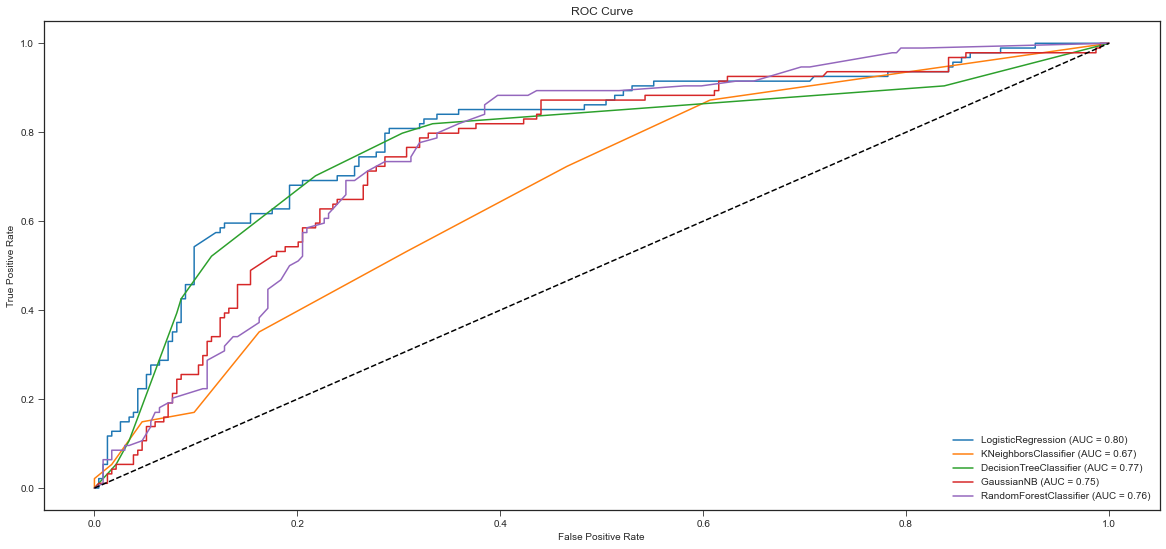

In [138]:
from sklearn.metrics import plot_roc_curve
classifiers = [logistic, knn, dt, naive, rf]
fig, ax = plt.subplots(figsize=(20,9))
for classifier in classifiers:
    plot_roc_curve(classifier, x_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1], linestyle='--',  color='k', label='minimum area required')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


### Conclusion
#### clearly, we can find roc area is more for logistic when compared to other models thus we can consider logistic as best model in this problem

### Predictions

In [139]:
result_df.head()

,y_test,Logistic_Test,KNN,DecisionTree,Bayesian,RandomForest,SVM
1148,0,0,0,0,0,0,0
1049,0,0,0,0,0,0,0
982,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0
1195,0,0,1,0,0,1,0


In [140]:
result_df.drop(labels=['KNN','DecisionTree','Bayesian','RandomForest','SVM'],axis=1,inplace=True)

In [141]:
result_df.head()

,y_test,Logistic_Test
1148,0,0
1049,0,0
982,0,0
808,0,0
1195,0,0


In [142]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
1148,3,28.0,0,0,8.050,1,2
1049,1,42.0,0,0,26.550,1,2
982,3,24.0,0,0,7.775,1,2
808,2,39.0,0,0,13.000,1,2
1195,3,24.0,0,0,7.750,0,1


In [143]:
predictions  = pd.concat([x_test, result_df], axis=1)

In [144]:
predictions.rename(columns={'y_test':'Survived'})

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived,Logistic_Test
1148,3,28.0,0,0,8.0500,1,2,0,0
1049,1,42.0,0,0,26.5500,1,2,0,0
982,3,24.0,0,0,7.7750,1,2,0,0
808,2,39.0,0,0,13.0000,1,2,0,0
1195,3,24.0,0,0,7.7500,0,1,0,0
...,...,...,...,...,...,...,...,...,...
88,1,23.0,3,2,263.0000,0,2,1,1
716,1,38.0,0,0,227.5250,0,0,1,1
754,2,48.0,1,2,65.0000,0,2,1,0
497,3,24.0,0,0,15.1000,1,2,0,0
